In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd ./drive/My\ Drive/AutonomousDriving

/content/drive/My Drive/AutonomousDriving


In [ ]:
#First time only
#!git clone --recursive https://github.com/sshaoshuai/PointRCNN.git

Cloning into 'PointRCNN'...
remote: Enumerating objects: 85, done.
remote: Total 85 (delta 0), reused 0 (delta 0), pack-reused 85
Unpacking objects: 100% (85/85), done.
Submodule 'pointnet2_lib' (https://github.com/sshaoshuai/Pointnet2.PyTorch.git) registered for path 'pointnet2_lib'
Cloning into '/content/drive/My Drive/AutonomousDriving/PointRCNN/pointnet2_lib'...
remote: Enumerating objects: 45, done.        
remote: Total 45 (delta 0), reused 0 (delta 0), pack-reused 45        
Submodule path 'pointnet2_lib': checked out '5a4416f51ceaeba242828cabf39133433336850d'


In [3]:
%cd ./PointRCNN

/content/drive/My Drive/AutonomousDriving/PointRCNN


In [ ]:
#To check if GPU is running or not, run following command
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Wed Aug  5 23:29:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+

In [4]:
!pip install torch==1.0.0 torchvision==0.2.1
!pip install fire
!pip install tensorboardX

     |████████████████████████████████| 591.8MB 27kB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 81kB 2.2MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=6a5b497efaa3c894550842c63c75bc06ef8bc225d3075ce1d14615f1e7e0402a
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
Successfully built fire
     |████████████████████████████████| 317kB 2.7MB/s 


In [5]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.is_available())

1.0.0
9.0.176
7401
True


In [5]:
!sh build_and_install.sh

running install
running bdist_egg
running egg_info
writing pointnet2.egg-info/PKG-INFO
writing dependency_links to pointnet2.egg-info/dependency_links.txt
writing top-level names to pointnet2.egg-info/top_level.txt
writing manifest file 'pointnet2.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_ext
creating build/bdist.linux-x86_64/egg
copying build/lib.linux-x86_64-3.6/pointnet2_cuda.cpython-36m-x86_64-linux-gnu.so -> build/bdist.linux-x86_64/egg
creating stub loader for pointnet2_cuda.cpython-36m-x86_64-linux-gnu.so
byte-compiling build/bdist.linux-x86_64/egg/pointnet2_cuda.py to pointnet2_cuda.cpython-36.pyc
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying pointnet2.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying pointnet2.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying pointnet2.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying pointnet2.egg-in

In [6]:
%cd ./tools

/content/drive/My Drive/AutonomousDriving/PointRCNN/tools


In [ ]:
import os

label_dir = "../data/KITTI/object/training/label_2/"
label_list = os.listdir(label_dir)
label_list.sort()

for label_file in label_list:
  label_path = os.path.join(label_dir, label_file)
  
  fin = open(label_path, "rt")
  data = fin.read()
  data = data.replace('VEHICLE', 'Car')
  data = data.replace('PEDESTRIAN', 'Pedestrian')
  fin.close()

  fin = open(label_path, "wt")
  fin.write(data)
  fin.close()
  print(label_file)

print("done!")

Streaming output truncated to the last 5000 lines.
../data/KITTI/object/training/label_2/002492.txt
../data/KITTI/object/training/label_2/002493.txt
../data/KITTI/object/training/label_2/002494.txt
../data/KITTI/object/training/label_2/002495.txt
../data/KITTI/object/training/label_2/002496.txt
../data/KITTI/object/training/label_2/002497.txt
../data/KITTI/object/training/label_2/002498.txt
../data/KITTI/object/training/label_2/002499.txt
../data/KITTI/object/training/label_2/002500.txt
../data/KITTI/object/training/label_2/002501.txt
../data/KITTI/object/training/label_2/002502.txt
../data/KITTI/object/training/label_2/002503.txt
../data/KITTI/object/training/label_2/002504.txt
../data/KITTI/object/training/label_2/002505.txt
../data/KITTI/object/training/label_2/002506.txt
../data/KITTI/object/training/label_2/002507.txt
../data/KITTI/object/training/label_2/002508.txt
../data/KITTI/object/training/label_2/002509.txt
../data/KITTI/object/training/label_2/002510.txt
../data/KITTI/obje

Training

In [9]:
#generate the ground truth database
!python generate_gt_database.py --class_name 'Car' --split train

Streaming output truncated to the last 5000 lines.
process gt sample (id=000434)
No gt object
process gt sample (id=000435)
No gt object
process gt sample (id=000438)
No gt object
process gt sample (id=000439)
No gt object
process gt sample (id=000441)
No gt object
process gt sample (id=000442)
No gt object
process gt sample (id=000444)
No gt object
process gt sample (id=000445)
No gt object
process gt sample (id=000447)
No gt object
process gt sample (id=000449)
No gt object
process gt sample (id=000456)
process gt sample (id=000458)
process gt sample (id=000460)
process gt sample (id=000461)
process gt sample (id=000462)
process gt sample (id=000464)
process gt sample (id=000465)
process gt sample (id=000466)
process gt sample (id=000467)
process gt sample (id=000470)
process gt sample (id=000471)
No gt object
process gt sample (id=000474)
process gt sample (id=000482)
process gt sample (id=000483)
process gt sample (id=000484)
process gt sample (id=000487)
process gt sample (id=0004

In [15]:
#Training of RPN stage
!python train_rcnn.py --cfg_file cfgs/default.yaml \
    --ckpt ../output/rpn/default/ckpt/checkpoint_epoch_200.pth \
    --batch_size 16 --train_mode rpn --epochs 200 --ckpt_save_interval 10

Streaming output truncated to the last 5000 lines.
train:  85% 115/135 [02:23<00:22,  1.14s/it, total_it=24549]
epochs:  90% 181/200 [7:53:27<51:36, 162.98s/it, rpn_loss=1.08, loss=1.08, lr=0.000111]
train:  86% 116/135 [02:24<00:19,  1.01s/it, total_it=24550]
epochs:  90% 181/200 [7:53:28<51:36, 162.98s/it, rpn_loss=1.09, loss=1.09, lr=0.000111]
train:  87% 117/135 [02:27<00:28,  1.59s/it, total_it=24551]
epochs:  90% 181/200 [7:53:31<51:36, 162.98s/it, rpn_loss=1.16, loss=1.16, lr=0.000111]/content/drive/My Drive/AutonomousDriving/PointRCNN/tools/../lib/utils/calibration.py:68: RuntimeWarning: divide by zero encountered in true_divide
  pts_img = (pts_2d_hom[:, 0:2].T / pts_rect_hom[:, 2]).T  # (N, 2)

train:  87% 118/135 [02:28<00:26,  1.55s/it, total_it=24552]
epochs:  90% 181/200 [7:53:32<51:36, 162.98s/it, rpn_loss=0.998, loss=0.998, lr=0.000111]
train:  88% 119/135 [02:29<00:20,  1.28s/it, total_it=24553]
epochs:  90% 181/200 [7:53:33<51:36, 162.98s/it, rpn_loss=1.04, loss=1.04,

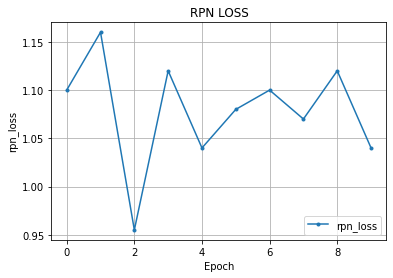

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

rpn_loss = [1.1, 1.16, 0.955, 1.12, 1.04, 1.08, 1.1, 1.07, 1.12, 1.04]

plt.plot(range(0, 10), rpn_loss, marker='.', label='rpn_loss')
plt.title('RPN LOSS')
plt.xlabel('Epoch')
plt.ylabel('rpn_loss')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

#plt.savefig("rpn_loss.pdf")

In [9]:
#Training of RCNN stage
!python train_rcnn.py --cfg_file cfgs/default.yaml \
    --ckpt ../output/rcnn/default/ckpt/checkpoint_epoch_50.pth \
    --batch_size 4 --train_mode rcnn \
    --epochs 70  --ckpt_save_interval 5 \
    --rpn_ckpt ../output/rpn/default/ckpt/checkpoint_epoch_200.pth

Streaming output truncated to the last 5000 lines.
train:  41% 224/542 [03:56<05:29,  1.04s/it, total_it=35453]
epochs:  75% 15/20 [2:32:27<47:16, 567.35s/it, reg_fg_sum=116, loss=1.49, lr=5.83e-5]
train:  42% 225/542 [03:57<05:32,  1.05s/it, total_it=35454]
epochs:  75% 15/20 [2:32:28<47:16, 567.35s/it, reg_fg_sum=124, loss=1.35, lr=5.83e-5]
train:  42% 226/542 [03:58<05:33,  1.06s/it, total_it=35455]
epochs:  75% 15/20 [2:32:29<47:16, 567.35s/it, reg_fg_sum=114, loss=1.28, lr=5.83e-5]
train:  42% 227/542 [03:59<05:28,  1.04s/it, total_it=35456]
epochs:  75% 15/20 [2:32:30<47:16, 567.35s/it, reg_fg_sum=129, loss=1.28, lr=5.82e-5]
train:  42% 228/542 [04:01<05:33,  1.06s/it, total_it=35457]
epochs:  75% 15/20 [2:32:31<47:16, 567.35s/it, reg_fg_sum=113, loss=1.46, lr=5.82e-5]
train:  42% 229/542 [04:02<05:31,  1.06s/it, total_it=35458]
epochs:  75% 15/20 [2:32:32<47:16, 567.35s/it, reg_fg_sum=127, loss=1.44, lr=5.81e-5]
train:  42% 230/542 [04:03<05:27,  1.05s/it, total_it=35459]
epochs

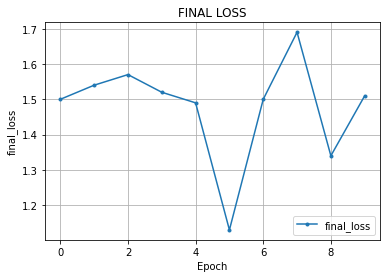

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

final_loss = [1.5, 1.54, 1.57, 1.52, 1.49, 1.13, 1.5, 1.69, 1.34, 1.51]

plt.plot(range(0, 10), final_loss, marker='.', label='final_loss')
plt.title('FINAL LOSS')
plt.xlabel('Epoch')
plt.ylabel('final_loss')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

plt.savefig("final_loss.pdf")

Inference

In [15]:
# RPN Evaluation
!python eval_rcnn.py --cfg_file cfgs/default.yaml \
    --ckpt ../output/rpn/default/ckpt/checkpoint_epoch_200.pth \
    --batch_size 4 --eval_mode rpn \
    --save_rpn_feature

2020-08-07 04:24:25,731   INFO  **********************Start logging**********************
2020-08-07 04:24:25,732   INFO  cfg_file         cfgs/default.yaml
2020-08-07 04:24:25,732   INFO  eval_mode        rpn
2020-08-07 04:24:25,732   INFO  eval_all         False
2020-08-07 04:24:25,733   INFO  test             False
2020-08-07 04:24:25,733   INFO  ckpt             ../output/rpn/default/ckpt/checkpoint_epoch_200.pth
2020-08-07 04:24:25,733   INFO  rpn_ckpt         None
2020-08-07 04:24:25,733   INFO  rcnn_ckpt        None
2020-08-07 04:24:25,733   INFO  batch_size       4
2020-08-07 04:24:25,733   INFO  workers          4
2020-08-07 04:24:25,733   INFO  extra_tag        default
2020-08-07 04:24:25,734   INFO  output_dir       None
2020-08-07 04:24:25,734   INFO  ckpt_dir         None
2020-08-07 04:24:25,734   INFO  save_result      False
2020-08-07 04:24:25,734   INFO  save_rpn_feature True
2020-08-07 04:24:25,734   INFO  random_select    True
2020-08-07 04:24:25,734   INFO  start_epo

In [16]:
#RCNN Evaluation
!python eval_rcnn.py --cfg_file cfgs/default.yaml \
    --ckpt ../output/rcnn/default/ckpt/checkpoint_epoch_70.pth \
    --batch_size 4 --eval_mode rcnn \
    #--set RPN.LOC_XZ_FINE False

2020-08-07 05:16:12,260   INFO  **********************Start logging**********************
2020-08-07 05:16:12,746   INFO  cfg_file         cfgs/default.yaml
2020-08-07 05:16:12,753   INFO  eval_mode        rcnn
2020-08-07 05:16:12,753   INFO  eval_all         False
2020-08-07 05:16:12,754   INFO  test             False
2020-08-07 05:16:12,754   INFO  ckpt             ../output/rcnn/default/ckpt/checkpoint_epoch_70.pth
2020-08-07 05:16:12,754   INFO  rpn_ckpt         None
2020-08-07 05:16:12,755   INFO  rcnn_ckpt        None
2020-08-07 05:16:12,755   INFO  batch_size       4
2020-08-07 05:16:12,755   INFO  workers          4
2020-08-07 05:16:12,755   INFO  extra_tag        default
2020-08-07 05:16:12,755   INFO  output_dir       None
2020-08-07 05:16:12,756   INFO  ckpt_dir         None
2020-08-07 05:16:12,756   INFO  save_result      False
2020-08-07 05:16:12,756   INFO  save_rpn_feature False
2020-08-07 05:16:12,756   INFO  random_select    True
2020-08-07 05:16:12,756   INFO  start_e